In [23]:
import numpy as np
import random
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
from scipy.spatial.distance import cdist
from itertools import combinations, product
from time import time

In [24]:
def calculate_average(*args,**kwargs):
    return np.mean(args)

In [115]:
def calculate_cost(data: np.ndarray) -> np.ndarray:
    costs = cdist(data[:,2].reshape(-1,1), data[:,2].reshape(-1,1),calculate_average)
    distances = np.round(cdist(data[:,:2], data[:,:2], 'euclidean'))
    distances = distances + costs
    return distances

In [116]:
def random_initial_solution(data, distances):
    ind = list(range(len(data)))
    i = random.randrange(len(ind))
    limit = len(data) // 2
    order = [ind[i]]
    while(len(ind) > limit):
        ind = np.delete(ind, i, 0)
        i = random.randrange(len(ind))
        order.append(ind[i])
    return order

In [117]:
def create_neighborhood(order, total):
    ind = list(range(len(order)))
    # inter-route: one selected, one not selected
    not_selected = np.setdiff1d(list(range(total)), order)
    inter_route = [[False] + list(x) for x in list(product(ind, not_selected))]
    # intra-route:
    intra = list(combinations(ind, 2))
    # edge exchange:
    edge_ex = [[True] + list(x) for x in intra]
    return inter_route + edge_ex, not_selected

In [152]:
def calculate_deltas(order, distances, neighborhood):
    out = []
    for move in neighborhood:
        if not move[0]:
                a = order[move[1] - 1]
                b = order[(move[1] + 1) % len(order)]
                old = distances[a][order[move[1]]] + distances[order[move[1]]][b]
                new = distances[a][move[2]] + distances[move[2]][b]
                if old - new > 0:
                    out.append([old - new] + move)
        else:
            a = order[move[1]-1]
            b = order[move[2]-1]
            old = distances[a][order[move[1]]] + distances[b][order[move[2]]]
            new = distances[a][b] + distances[order[move[1]]][order[move[2]]]
            if old - new > 0:
                out.append([old - new] + move)
    return sorted(out, reverse=True)

In [ ]:
def remove_deltas(removed_edges, removed_node):
    if removed_node:
        
    else:
        

In [239]:
def update_order_and_deltas(order, distances, deltas, chosen_move, not_selected): #
    # delta ma nast. strukturę: [poprawa, typ(False/True), node_a, node_b]
    
    # if typ == False -> nie ma node_b (który jest indeksem w data)
    # if typ == True -> oba są (i są indeksami w order)
    if not chosen_move[1]: # node exchange
        not_selected = np.delete(not_selected, np.where(not_selected == chosen_move[3]))
        not_selected = np.append(not_selected, [order[chosen_move[2]]])
        # usuwamy z deltas wszystkie ruchy gdzie typ False i delta[2] == chosen_move[2]
        # ruchy gdzie typ True i delta[3] == chosen_move[2] (przypadki edge_exchange z nodem który teraz już jest poza cyklem)
        print(deltas)
#         deltas = np.array(deltas, dtype=int)
        print(chosen_move, order[chosen_move[2]])
        print('--------')
#         deltas = deltas[np.where(deltas[2] != chosen_move[2] & deltas[3] != chosen_move[2])]
        deltas = [_ for _ in deltas if (not _[1] and _[2] != chosen_move[2]) or
                    (_[1] and _[2] != chosen_move[2] and _[3] != chosen_move[2])]
        print(deltas)
        # dodajemy do deltas nowe ruchy:
            # od chosen_move[3](nowy node który wszerdł do cyklu) do każdego nie w cyklu:
            # chosen_move[3] będzie na indeksie order[chosen_move[2]], więc:
        inter_route = [[False] + list(x) for x in list(product([chosen_move[2]], not_selected))]
#         intra_route = 
        #delty dla nowych ruchów:
        inter_deltas = calculate_deltas(order, distances, inter_route)
        order[chosen_move[2]] = chosen_move[3]
        deltas = sorted(deltas + inter_deltas, reverse=True)
    else: #edge exchange
        print(deltas)
        print(chosen_move, order[chosen_move[2]])
        print('--------')
        
        deltas = [_ for _ in deltas if (not _[1] and _[2] != chosen_move[2]) or
                    (_[1] and _[2] != chosen_move[2] and _[3] != chosen_move[2])]
        
        print(deltas)
        # aktualizujemy order:
        ind = sorted([chosen_move[2], chosen_move[3]])
        if ind[0] == 0: 
            order = order[ind[1]-1::-1] + order[ind[1]:]
        else:
            order = order[:ind[0]] + order[ind[1]-1:ind[0]-1:-1] + order[ind[1]:]
    return order, deltas, not_selected

In [240]:
def calculate_value(data, distances, ordr):
    order = ordr.copy()
    order.append(order[0])
    value = sum([distances[x][y] for x, y in zip(order, order[1:])])
    path = [data[i] for i in order]
    return value, path

In [241]:
def local_search_steepest_deltas(data, distances):
    limit = len(data) // 2
    order = random_initial_solution(data, distances)
    neighborhood, not_selected = create_neighborhood(order, len(data))
    deltas = calculate_deltas(order, distances, neighborhood)
    while deltas:
        order, deltas, not_selected = update_order_and_deltas(order, distances, deltas, deltas[0], not_selected)
        if best_move is not None:
            if not best_move[0]:
                order[best_move[1]] = best_move[2]
            else:
                ind = sorted([best_move[1], best_move[2]])
                if ind[0] == 0: 
                    order = order[ind[1]-1::-1] + order[ind[1]:]
                else:
                    order = order[:ind[0]] + order[ind[1]-1:ind[0]-1:-1] + order[ind[1]:]
                    
    return calculate_value(data, distances, order)

In [242]:
def evaluate(func, data, n=200):
    distances = calculate_cost(data)
    total, worst_value, best_value, best_solution = 0, 0, float('inf'), None
    total_time, worst_time, best_time = 0,0,float('inf')
    for _ in tqdm(range(n)):
        start = time()
        value, solution = func(data, distances)
        elapsed = time() - start
        total_time += elapsed
        if elapsed < best_time:
            best_time = elapsed
        worst_time = max(worst_time, elapsed)


        total += value
        if value < best_value:
            best_solution = solution
            best_value = value
        worst_value = max(worst_value, value)

    return dict(average_score=total / n,
                worst_score=worst_value,
                best_score=best_value,
                solution=np.array(best_solution).T,
                average_time=total_time / n,
                worst_time= worst_time,
                best_time = best_time)

In [243]:
def summarize(func, data, title):
    evaluation_results = evaluate(func=func,
                                    data=data,
                                     n = len(data))
    (x, y, z) = evaluation_results["solution"]
    print(f'{title}:')
    print(f'average time: {evaluation_results["average_time"]}\tworst time: {evaluation_results["worst_time"]}\tbest time: {evaluation_results["best_time"]}')

    print(f'average score: {evaluation_results["average_score"]}\tworst score: {evaluation_results["worst_score"]}\tbest score: {evaluation_results["best_score"]}')
    print('Best solution:')

    plt.figure(figsize=(15,10))
    plt.scatter(data[:,0], data[:,1], np.full(data[:,0].size, 100), data[:,2], cmap='gray_r')
    plt.clim(0, 2000)
    plt.colorbar().set_label('cost', labelpad=-45, y=1.025, rotation=0)
    plt.plot(x, y, 'r')
    plt.xlim([-100, 4100])
    plt.ylim([-100, 2100])
    plt.title(title)
    plt.show()


In [244]:
data = np.loadtxt('TSPC.csv', dtype=int, delimiter=';')

In [258]:
summarize(local_search_steepest_deltas, data[:10], 'Local search greedy candidate')

  0%|          | 0/10 [00:00<?, ?it/s]

[[1994.0, False, 3, 9], [1337.0, True, 2, 4], [1322.0, False, 2, 0], [924.0, False, 3, 2], [861.0, False, 2, 2], [812.0, False, 3, 0], [64.0, False, 2, 3]]
[1994.0, False, 3, 9] 7
--------
[[1337.0, True, 2, 4], [1322.0, False, 2, 0], [861.0, False, 2, 2], [64.0, False, 2, 3]]


NameError: name 'best_move' is not defined

50


  0%|          | 0/50 [00:00<?, ?it/s]

Local search steepest candidate:
average time: 0.03289198875427246	worst time: 0.0568537712097168	best time: 0.024932861328125
average score: 26341.6	worst score: 30261.0	best score: 24180.0
Best solution:


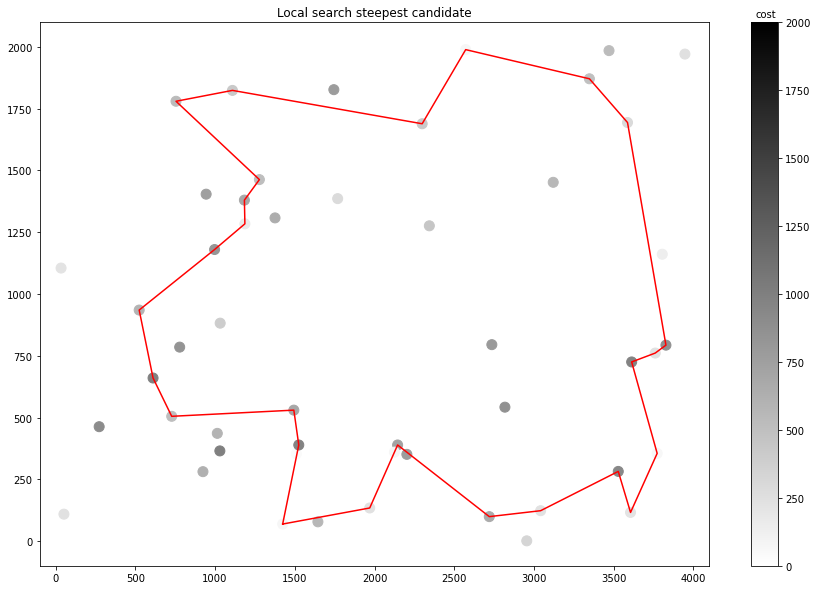

In [194]:
summarize(local_search_steepest_candidate, data[:50], 'Local search steepest candidate')

In [30]:
data = np.loadtxt('TSPB.csv', dtype=int, delimiter=';')


Greedy cycle:
average score: 121592.715	worst score: 131138.0	best score: 111115.0
Best solution:


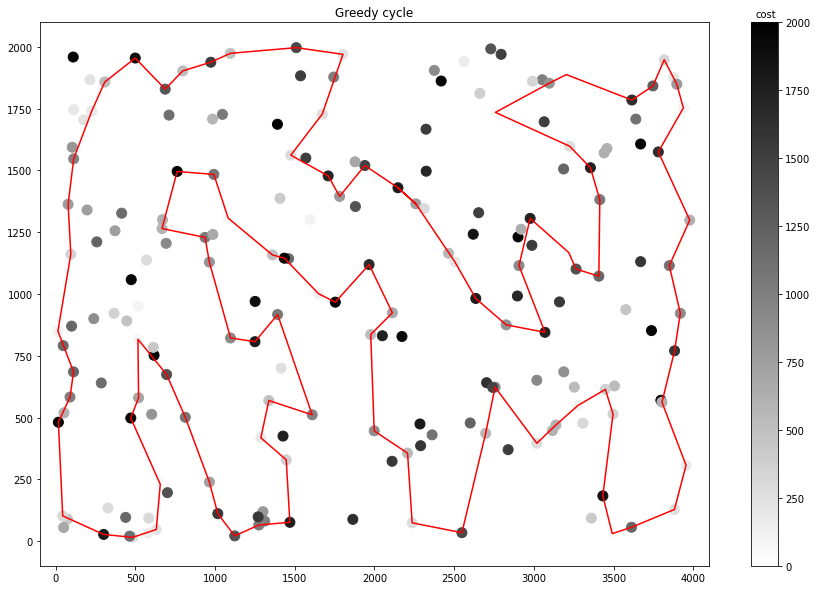

In [31]:
summarize(greedy_cycle, data, 'Greedy cycle',weight=1)


Greedy cycle:
average score: 71790.85	worst score: 77676.0	best score: 70153.0
Best solution:


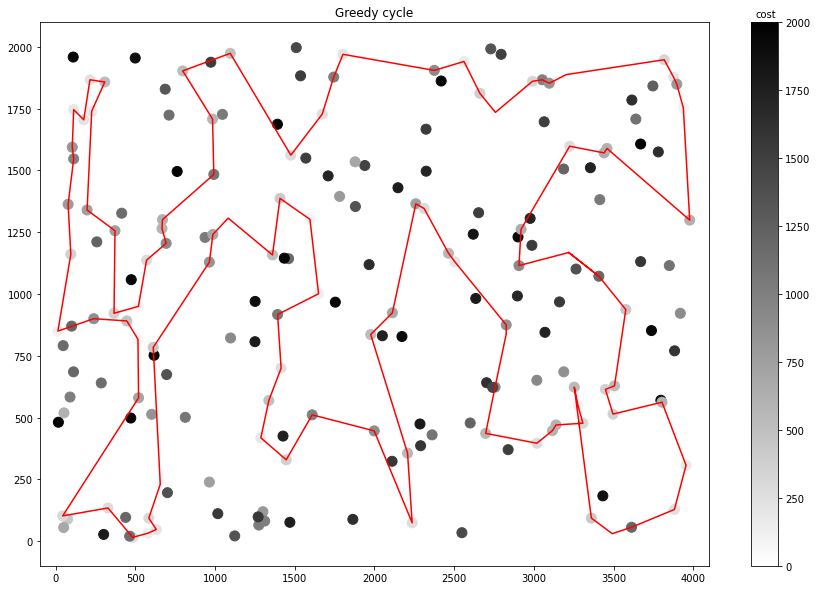

In [32]:
summarize(greedy_cycle, data, 'Greedy cycle',weight=0.5)